In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


<h1>Processing Data</h1>

In [2]:
data=  pd.read_csv("DATA.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.shape

(541909, 8)

In [4]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
data['CustomerID']=data['CustomerID'].astype('object')

In [6]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [7]:
data.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [8]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315,United Kingdom


In [9]:
data[data['UnitPrice']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,12/8/2011 14:06,0.0,NaN,United Kingdom


In [10]:
def missing_val(df):
    missing_values=df.isnull().sum()
    missing_percentage=missing_values*100/len(df['InvoiceNo'])
    missing_percentage=missing_percentage.sort_values(ascending=False)
    return missing_percentage

In [11]:
missing_val(data)

CustomerID     24.926694
Description     0.268311
Country         0.000000
UnitPrice       0.000000
InvoiceDate     0.000000
Quantity        0.000000
StockCode       0.000000
InvoiceNo       0.000000
dtype: float64

In [12]:
df_customerID_NA=data[data['CustomerID'].isnull()]
df_customerID_NA.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [13]:
data=data[data['CustomerID'].notnull()]
data.reset_index(inplace=True, drop=True)
data.drop_duplicates(inplace=True)

In [14]:
print(data.shape)
print(data.nunique())

(401604, 8)
InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  object 
 7   Country      401604 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.6+ MB


In [16]:
df=data[(data['Quantity']>0) & (data['UnitPrice']>0)]
df.shape

(392692, 8)

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  object 
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  object 
 7   Country      392692 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.0+ MB


In [19]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [20]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [21]:
print('Summary')
print("Number of tranbsactions: ",df['InvoiceNo'].nunique() )
print("Nmber of product bought: ", df['StockCode'].nunique())
print("Number of customers: ", df['CustomerID'].nunique())

Summary
Number of tranbsactions:  18532
Nmber of product bought:  3665
Number of customers:  4338


<h1>What is RFM (recency, frequency, monetary) analysis ? </h1>
1. Recency:  How recent was the customer's last purchase? (Days since last purchase) <br>
2. Frequency : How often did this customer make a purchase in a given period? (Total number of purchases) <br>
3. Monetary : How much money did the customer spend in a given period? ( Total money this customer spent.)

<h4>1. RECENCY</h4>

In [22]:
Now = df['InvoiceDate'].max()
Now

Timestamp('2011-12-09 12:50:00')

In [23]:
import datetime as dt
df['Date']=df['InvoiceDate'].dt.date

In [24]:
recency=df.groupby('CustomerID')['Date'].max().reset_index(name="Last_purchase_date")
recency

,CustomerID,Last_purchase_date
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4333,18280.0,2011-03-07
4334,18281.0,2011-06-12
4335,18282.0,2011-12-02
4336,18283.0,2011-12-06


In [25]:
recency['Recency']=(Now - pd.to_datetime(recency['Last_purchase_date'])).dt.days
recency.head()

,CustomerID,Last_purchase_date,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


<h4>2. Frequency</h4>

In [26]:
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index(name='Frequency')
frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


<h4>3. Monetary</h4>

In [27]:
df['Total']=df['Quantity']*df['UnitPrice']
monetary=df.groupby('CustomerID')['Total'].sum().reset_index(name='Monetary')
monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [28]:
MER = recency.merge(frequency, how='inner', on='CustomerID')
RFM = MER.merge(monetary, how='inner', on='CustomerID')
RFM


,CustomerID,Last_purchase_date,Recency,Frequency,Monetary
0,12346.0,2011-01-18,325,1,77183.60
1,12347.0,2011-12-07,2,7,4310.00
2,12348.0,2011-09-25,75,4,1797.24
3,12349.0,2011-11-21,18,1,1757.55
4,12350.0,2011-02-02,310,1,334.40
...,...,...,...,...,...
4333,18280.0,2011-03-07,277,1,180.60
4334,18281.0,2011-06-12,180,1,80.82
4335,18282.0,2011-12-02,7,2,178.05
4336,18283.0,2011-12-06,3,16,2045.53


In [29]:
rfm = RFM.copy()
rfm.shape

(4338, 5)

In [32]:
rfm.drop(['Last_purchase_date'], axis=1, inplace= True)
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


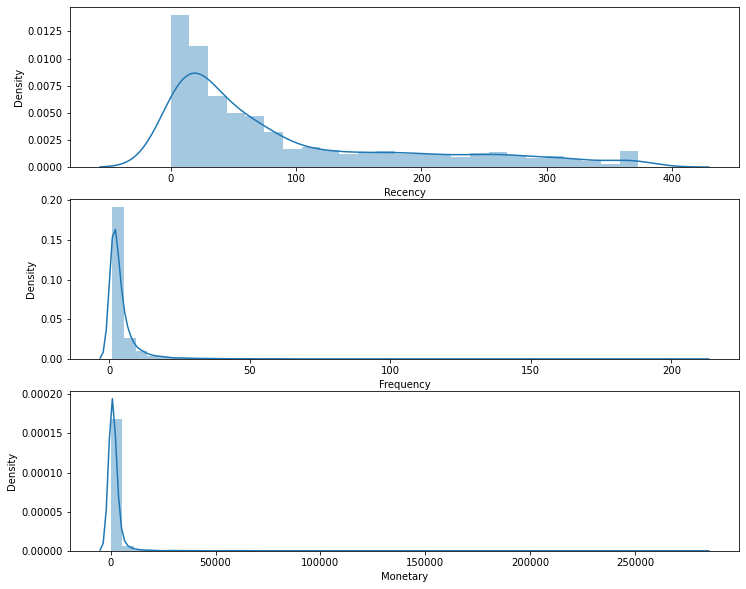

In [42]:
plt.figure(figsize=(12,10))
plt.subplot(3,1,1)
sns.distplot(rfm['Recency'])
plt.subplot(3,1,2)
sns.distplot(rfm['Frequency'])
plt.subplot(3,1,3)
sns.distplot(rfm['Monetary'])
plt.show()

In [89]:
skew = []
for i in rfm.columns[1:]:
    skew.append(rfm[i].skew())
skew_value = pd.DataFrame({'Recency':[skew[0]], 'Frequency':[skew[1]], 'Manetary':[skew[2]]}, index=['skew'])
skew_value
   

,Recency,Frequency,Manetary
skew,1.245826,12.067031,19.339368


In [90]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.059474,4.272015,2048.688081
std,1721.808492,100.012264,7.697998,8985.230220
min,12346.000000,0.000000,1.000000,3.750000
25%,13813.250000,17.000000,1.000000,306.482500
50%,15299.500000,50.000000,2.000000,668.570000
75%,16778.750000,141.750000,5.000000,1660.597500
max,18287.000000,373.000000,209.000000,280206.020000


In [91]:
li_output = []
for col_name in rfm.columns[1:]:
    value = abs(rfm[col_name].skew())
    if value >2:
        new_col_name = 'log' + col_name
        li_output.append(new_col_name)
        rfm[new_col_name]=np.log(0.01 + rfm[col_name])
    else:
        li_output.append(col_name)

In [92]:
li_output

['Recency', 'logFrequency', 'logMonetary']

In [95]:
features = rfm[['CustomerID',"Recency","logFrequency","logMonetary"]]

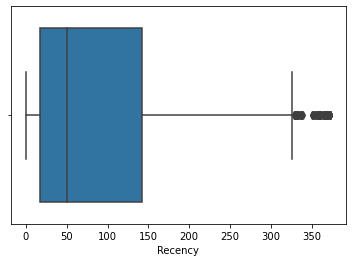

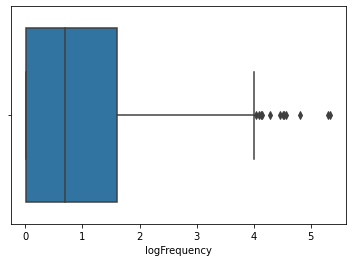

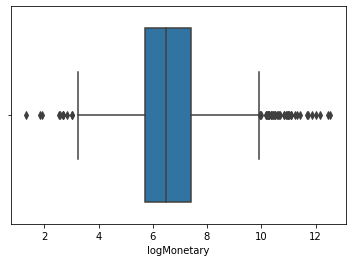

In [96]:
for i in features.columns[1:]:
    sns.boxplot(features[i])
    plt.show()

In [97]:
for i in features.columns[1:]:
    q1 = features[i].quantile(0.25)
    q3 = features[i].quantile(0.75)
    iqr = q3 - q1
    low_=q1 - (1.5*iqr)
    up_ =q3 + (1.5*iqr)
    features = features[(features[i]>low_) & (features[i]<up_)]

In [146]:
features.reset_index(inplace =True, drop = True)

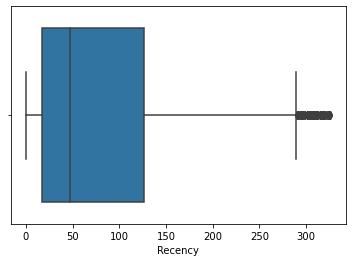

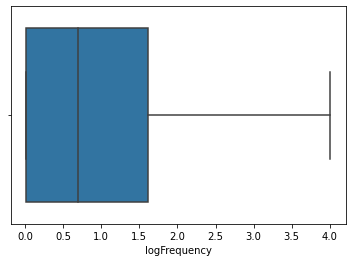

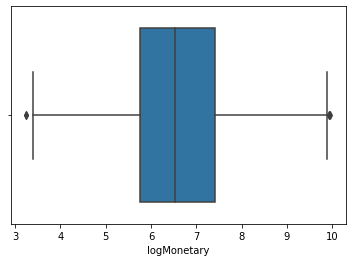

In [98]:
for i in features.columns[1:]:
    sns.boxplot(features[i])
    plt.show()

In [147]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4131 entries, 0 to 4130
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    4131 non-null   float64
 1   Recency       4131 non-null   int64  
 2   logFrequency  4131 non-null   float64
 3   logMonetary   4131 non-null   float64
 4   clusters      4131 non-null   int32  
dtypes: float64(3), int32(1), int64(1)
memory usage: 145.4 KB


In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features.drop(['CustomerID'],axis=1))
X_scaler = scaler.transform(features.drop(['CustomerID'],axis=1))
RFM_features =pd.DataFrame(X_scaler, columns = features.columns[1:])
RFM_features

,Recency,logFrequency,logMonetary
0,-0.923033,1.148752,1.516019
1,-0.087741,0.499359,0.768692
2,-0.739956,-1.103747,0.749612
3,2.601212,-1.103747,-0.668102
4,-0.533993,1.303795,1.052737
...,...,...,...
4126,2.223614,-1.103747,-1.194435
4127,1.113706,-1.103747,-1.881364
4128,-0.865821,-0.303631,-1.206584
4129,-0.911591,2.108955,0.879255


In [124]:
from sklearn.cluster import KMeans
kmean_cluster = {"init":"random","n_init":10}
sse = []
for i in range(1,10):
    kmeans =  KMeans(n_clusters=i, **kmean_cluster)
    kmeans.fit(RFM_features)
    sse.append(kmeans.inertia_)

In [107]:
sse

[12392.999999999995,
 6297.2758083670815,
 4007.4470339742575,
 3028.053072974439,
 2614.8269223288503,
 2241.3931722848192,
 2048.4560253664436,
 1866.3313289842254,
 1708.9112558942247]

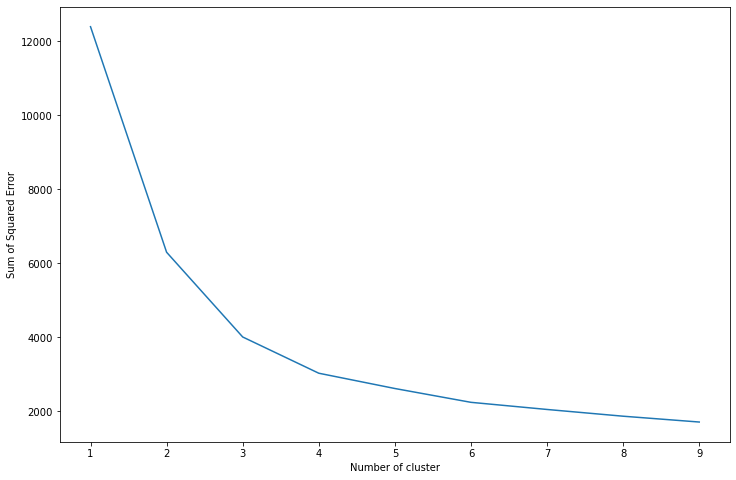

In [111]:
plt.figure(figsize= (12,8))
plt.plot(range(1,10),sse)
plt.xticks(range(1,10))
plt.xlabel("Number of cluster")
plt.ylabel('Sum of Squared Error')
plt.show()

In [156]:
kmeans = KMeans(n_clusters=3, **kmean_cluster)
kmeans.fit(RFM_features)
RFM_features["clusters"] = kmeans.labels_
RFM_features.head()

,Recency,logFrequency,logMonetary,clusters
0,-0.923033,1.148752,1.516019,2
1,-0.087741,0.499359,0.768692,2
2,-0.739956,-1.103747,0.749612,1
3,2.601212,-1.103747,-0.668102,0
4,-0.533993,1.303795,1.052737,2


In [151]:
kmeans = KMeans(n_clusters=3, **kmean_cluster)
kmeans.fit(RFM_features)
features["clusters"] = kmeans.labels_
features.head() 

,CustomerID,Recency,logFrequency,logMonetary,clusters
0,12347.0,2,1.947338,8.368696,2
1,12348.0,75,1.388791,7.494013,2
2,12349.0,18,0.009950,7.471682,1
3,12350.0,310,0.009950,5.812368,0
4,12352.0,36,2.080691,7.826463,2


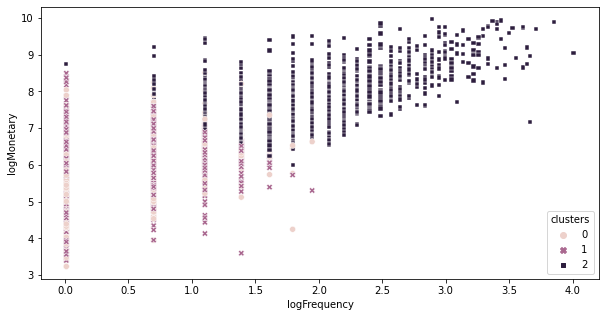

In [157]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='logFrequency', y='logMonetary', hue = 'clusters', style = 'clusters', data = features)
plt.show()

<h3>Khách hàng có tần suất mua hàng cao thường chi tiền mua sản phẩm nhiều hơn khách hàng  có tần suất mua hàng thấp thì có số tiền họ chi khá thấp</h3>

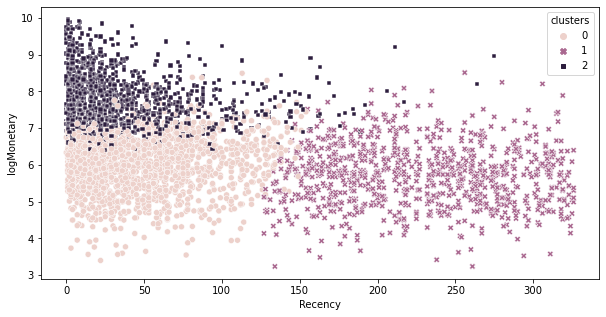

In [142]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Recency', y='logMonetary', hue = 'clusters', style = 'clusters', data = features)
plt.show()

<h3>Khách hàng mua gần đây có xu hướng chi nhiều tiền hơn nhìn chung khách hàng mua hàng có mức chi gần như nhau. <br>
Qua đây ta có thể nhận định rằng có nhóm khách hàng: <br>
- Nhóm khách hàng '2' là nhóm khách hàng có tần suất mua hàng cao, số tiền bỏ ra nhiều và cũng là khách hàng mua gần đây nhóm khách hàng này là nhóm khách hàng thân thiết chúng ta co thể đưa ra các chương trình về tri ân hoặc số điểm tích lũy( nếu có ) để giữ họ.<br><br>
- Nhóm khách hàng tiếp theo là nhóm khách hàng '0' nhóm khách hàng này là nhóm khách hàng tiềm năng nhóm khách hàng này thường xuyên quay lại cửa hàng mua sản phẩm nhưng với tần suất và số tiền họ chi ra không nhiều nhóm khách hàng này chúng ta có thể tập chung giới thiệu các chương trình khuyến mãi , các chương trình tích điểm( nếu có), các voucher giảm giá với hóa đơn ở một ngưỡng nhất định hoặc voucher giảm giá cho kì mua hàng tiếp theo để tăng tần suất mua hàng từ đó thì số tiền họ chi ra nhiều hơn.<br><br>
- Nhóm khách hàng còn lại là nhóm '1' nhóm khách hàng này là nhóm khách hàng có xu hướng rời đi chúng ta cần tập trung để đưa nhóm khách hàng này quay trở lại bằng các chương trình khuyến mãi lớn, trao cho họ nhungwc voucher ưu đãi để họ quay lại mua hàng. </h3>

In [181]:
 summary = features.groupby(['clusters'])['CustomerID'].nunique().reset_index(name='Numbuyers')
 summary

,clusters,Numbuyers
0,0,899
1,1,1712
2,2,1520


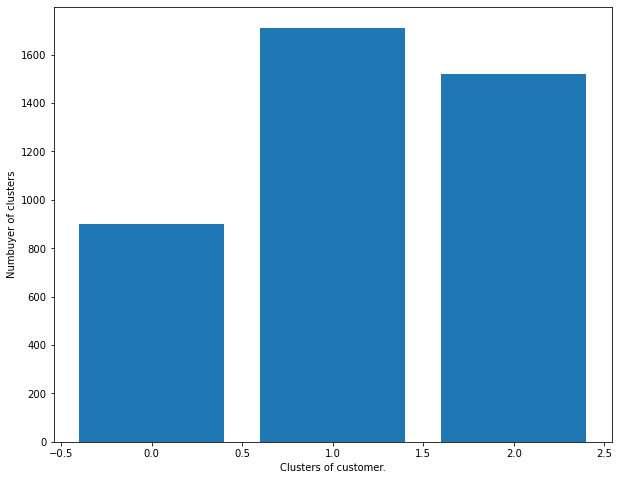

In [185]:
plt.figure(figsize=(10,8))
plt.bar(summary['clusters'], summary['Numbuyers'])
plt.xlabel("Clusters of customer.")
plt.ylabel('Numbuyer of clusters')
plt.show()

<h3>Nhóm khách hàng rời đi khá lớn vì vậy cần đưa ra những chiến dịch marketing và các chương trình khuyến mãi để thúc đẩy họ quay trở lại mua hàng. Bên cạnh đó cũng cần tìm hiểu xem vì sao những khách hàng này có xu hướng rời đi bằng cách kiểm tra thông tin cá nhân giá trị hóa đơn khu vực mua hàng để khoanh vùng khu vực và có kế hoạch điều chỉnh phù hợp!</h3>